# Carregando os dados

In [19]:
# Fazendo o download dos dados do Kaggle
import kagglehub

url = kagglehub.dataset_download("unclesamulus/blood-cells-image-dataset")

print("Path to dataset files:", url)

# Definindo os diretórios
import pathlib
data_dir = pathlib.Path(url) / 'bloodcells_dataset'
print(data_dir)

Path to dataset files: /root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2
/root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2/bloodcells_dataset


In [20]:
# Visualizar o número de arquivos com a extensão .jpg no meu diretório.

len(list(data_dir.glob('*/*.[jJ][pP][gG]')))

17092

In [21]:
# Exibindo as pastas dentro do meu diretório utilizando um list comprehension.
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['lymphocyte',
 'neutrophil',
 'erythroblast',
 'monocyte',
 'ig',
 'eosinophil',
 'platelet',
 'basophil']

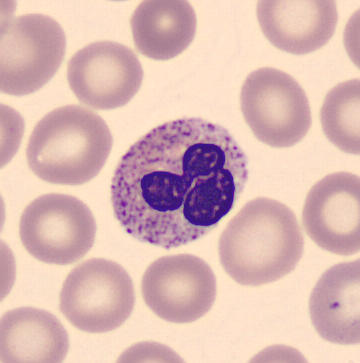

In [22]:
# Visualizando uma imagem de um subdiretório:
import PIL # Importando a biblioteca PIL

neutrophil = list(data_dir.glob('neutrophil/*'))
PIL.Image.open(str(neutrophil[0]))

# Explorando e visualizando os dados

In [23]:
import numpy as np

for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.[jJ][pP][gG]'))
  print(f'O {subfolder} tem {len(images)} imagens.') # Identificando o número de imagens dentro de cada subdiretório.

  if images: # Identificando as dimensões das primeiras imagens dentro de cada um dos subdiretórios.
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f'A primeira imagem do {subfolder} tem dimensão {img_array.shape}.')
    # Imprime as dimensões altura (pixels) x largura (pixels) x nº canais

O lymphocyte tem 1214 imagens.
A primeira imagem do lymphocyte tem dimensão (363, 360, 3).
O neutrophil tem 3329 imagens.
A primeira imagem do neutrophil tem dimensão (363, 360, 3).
O erythroblast tem 1551 imagens.
A primeira imagem do erythroblast tem dimensão (363, 360, 3).
O monocyte tem 1420 imagens.
A primeira imagem do monocyte tem dimensão (363, 360, 3).
O ig tem 2895 imagens.
A primeira imagem do ig tem dimensão (363, 360, 3).
O eosinophil tem 3117 imagens.
A primeira imagem do eosinophil tem dimensão (363, 360, 3).
O platelet tem 2348 imagens.
A primeira imagem do platelet tem dimensão (363, 360, 3).
O basophil tem 1218 imagens.
A primeira imagem do basophil tem dimensão (363, 360, 3).


# Carregando os dados com TensorFlow e dividindo os grupos em treino e validação

In [24]:
import tensorflow as tf

In [25]:
batch_size = 32
altura = 256
largura = 256

In [26]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir, # Definindo o diretório com as imagens
    validation_split = 0.2, # Reservando 20% das imagens para validação
    subset = 'training', # Definindo o subgrupo treino
    label_mode = 'categorical', # Definindo o formato das labels como categóricas
    seed = 123, # Fixando uma seed para reprodutibilidade dos resultados
    image_size = (altura, largura), # Definindo os tamanhos das imagens
    batch_size = batch_size # Definindo os tamanhos dos batches para importação
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [27]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical',
    seed = 123,
    image_size = (altura, largura),
    batch_size = batch_size
)

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [28]:
treino.class_names

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

# Montando um modelo de perceptron de múltiplas camadas

In [29]:
tf.random.set_seed(123123)

In [30]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (altura, largura, 3)),# Definindo os shapes das entradas
    tf.keras.layers.Rescaling(1./255), # Normalizando os dados
    tf.keras.layers.Flatten(), # Transformando a imagem em um vetor
    # Definindo as camadas
    tf.keras.layers.Dense(128, activation = 'relu'), # Camada oculta
    tf.keras.layers.Dense(8, activation='softmax') # Camada de saída
])

In [31]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Treinando o modelo

In [32]:
history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=10
)

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.1606 - loss: 34.3217 - val_accuracy: 0.1893 - val_loss: 2.0440
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.1974 - loss: 2.0371 - val_accuracy: 0.1893 - val_loss: 2.0154
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.1974 - loss: 2.0146 - val_accuracy: 0.1893 - val_loss: 2.0039
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.1979 - loss: 2.0059 - val_accuracy: 0.1893 - val_loss: 1.9999
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.1979 - loss: 2.0042 - val_accuracy: 0.1893 - val_loss: 1.9987
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.1982 - loss: 2.0030 - val_accuracy: 0.1893 - val_loss: 1.9982
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.1980 - loss: 2.0029 - val_accuracy: 0.1893 - val_loss: 1.9981
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.1984 - loss: 2.0027 -

In [33]:
history.history

{'accuracy': [0.17405295372009277,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093],
 'loss': [10.420613288879395,
  2.0307140350341797,
  2.012956380844116,
  2.0067834854125977,
  2.0050346851348877,
  2.004587173461914,
  2.0044772624969482,
  2.004450798034668,
  2.004441261291504,
  2.0044291019439697],
 'val_accuracy': [0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973],
 'val_loss': [2.043991804122925,
  2.0154030323028564,
  2.0038669109344482,
  1.9999451637268066,
  1.9986821413040161,
  1.9982450008392334,
  1.9981331825256348,
  1.9980520009994507,
  1.9980170726776123,
  1.9979649782180786]}

In [34]:
import matplotlib.pyplot as plt

def plota_resultados(history, epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)

  plt.figure(figsize = (12, 6))
  plt.subplot(1,2,1)
  plt.plot(intervalo_epocas, acc, 'blue', label = 'Acurácia de treino')
  plt.plot(intervalo_epocas, val_acc, 'red', label = 'Acurácia de validação')
  plt.title('Acurácia de treino e validação')
  plt.legend(loc = 'best')

  plt.subplot(1,2,2)
  plt.plot(intervalo_epocas, loss, 'blue', label = 'Erro de treino')
  plt.plot(intervalo_epocas, val_loss, 'red', label = 'Erro de validação')
  plt.title('Erro de treino e validação')
  plt.legend(loc = 'best')

  plt.show()

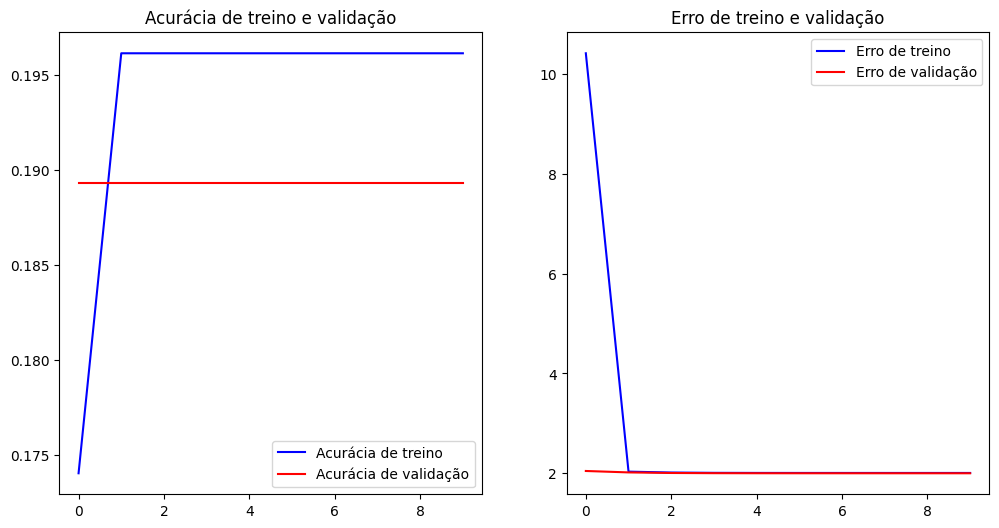

In [35]:
plota_resultados(history, 10)

In [36]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,500,954 (288.01 MB)

 Trainable params: 25,166,984 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,333,970 (192.01 MB)

# Aperfeiçoando o modelo

In [37]:
# Adicionando camadas convolucionais para aperfeiçoar o modelo

modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(altura, largura, 3)),  # Dimensões de entrada
    tf.keras.layers.Rescaling(1./255),  # Normalização
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduz a dimensão para um vetor fixo
    tf.keras.layers.Dense(64, activation='relu'),  # Camada oculta
    tf.keras.layers.Dense(8, activation='softmax')  # Camada de saída
])

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [38]:
# Aumentando o número de épocas para 15
epocas = 15

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas
)

Epoch 1/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 53s 98ms/step - accuracy: 0.2460 - loss: 1.8975 - val_accuracy: 0.4713 - val_loss: 1.3403
Epoch 2/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.5286 - loss: 1.2661 - val_accuracy: 0.5930 - val_loss: 1.1657
Epoch 3/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.5984 - loss: 1.0947 - val_accuracy: 0.6135 - val_loss: 1.0502
Epoch 4/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.6589 - loss: 0.8713 - val_accuracy: 0.6969 - val_loss: 0.8218
Epoch 5/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.7015 - loss: 0.7748 - val_accuracy: 0.7048 - val_loss: 0.7362
Epoch 6/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.7415 - loss: 0.6881 - val_accuracy: 0.7639 - val_loss: 0.6486
Epoch 7/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.7696 - loss: 0.6149 - val_accuracy: 0.7823 - val_loss: 0.5925
Epoch 8/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.7866 - loss: 0.5811 - 

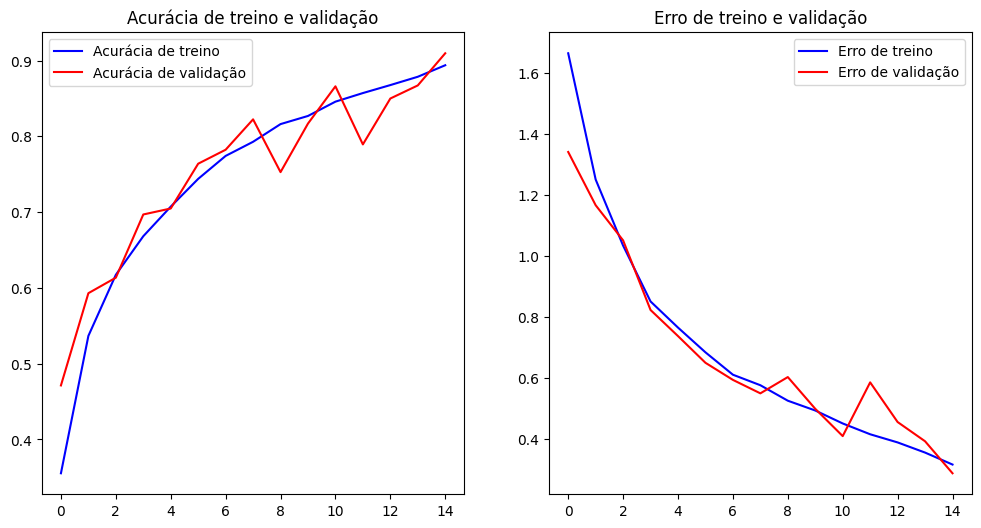

In [39]:
plota_resultados(history, epocas)

In [40]:
# Aumentando o número de épocas para 50

epocas2 = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas2
)

Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.8998 - loss: 0.2940 - val_accuracy: 0.9225 - val_loss: 0.2411
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.9058 - loss: 0.2668 - val_accuracy: 0.9075 - val_loss: 0.3002
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9116 - loss: 0.2653 - val_accuracy: 0.9236 - val_loss: 0.2383
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.9143 - loss: 0.2644 - val_accuracy: 0.9362 - val_loss: 0.2130
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - accuracy: 0.9223 - loss: 0.2371 - val_accuracy: 0.9391 - val_loss: 0.2023
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9264 - loss: 0.2271 - val_accuracy: 0.9412 - val_loss: 0.1925
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.9294 - loss: 0.2071 - val_accuracy: 0.9310 - val_loss: 0.2336
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.9260 - loss: 0.2140 - 

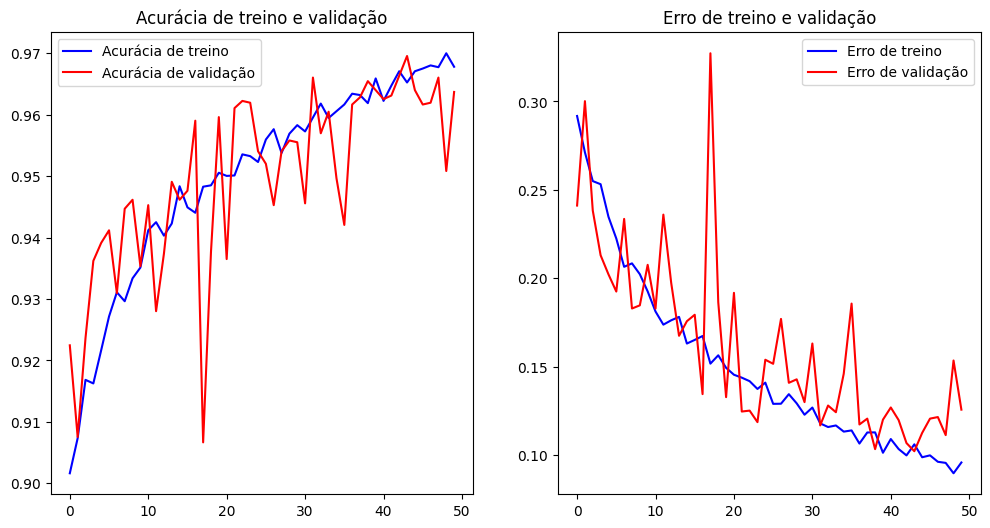

In [41]:
plota_resultados(history, epocas2)

In [42]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,074 (1.17 MB)

 Trainable params: 102,024 (398.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,050 (797.07 KB)

# Aumentando a diversidade do dataset - Data augmentation

In [64]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.5),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.2)
])

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

modelo = tf.keras.models.Sequential([
    # Aumentando a diversidade dos dados
    data_augmentation,

    # Normalização
    tf.keras.layers.Rescaling(1./255),

    # Adicionando camadas convolucionais e pooling
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                           input_shape = (altura, largura, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.3),  # Dropout para reduzir overfitting
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    # Reduzindo as dimensões do vetor para um valor fixo
    tf.keras.layers.GlobalAveragePooling2D(),

    # Camadas de saída
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Dropout para reduzir overfitting
    tf.keras.layers.Dense(8, activation='softmax')
])

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Ajuste com callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Ajustando o modelo após o aumento dos dados

epocas2 = 50


history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas2)

Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.9690 - loss: 0.0928 - val_accuracy: 0.9520 - val_loss: 0.1513
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9697 - loss: 0.0834 - val_accuracy: 0.9740 - val_loss: 0.0977
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9727 - loss: 0.0786 - val_accuracy: 0.9728 - val_loss: 0.1053
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9667 - loss: 0.0918 - val_accuracy: 0.9233 - val_loss: 0.2258
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.9668 - loss: 0.0931 - val_accuracy: 0.9693 - val_loss: 0.1078
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.9726 - loss: 0.0825 - val_accuracy: 0.9719 - val_loss: 0.1014
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9689 - loss: 0.0914 - val_accuracy: 0.9593 - val_loss: 0.1306
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9664 - loss: 0.0946 - 

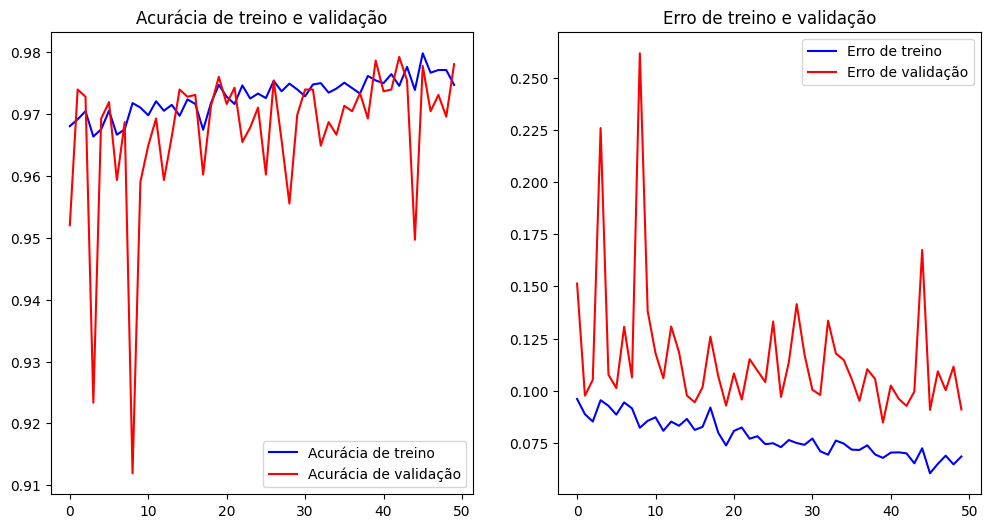

In [106]:
plota_resultados(history, epocas2)

In [89]:
# Salvando o modelo
modelo.save('modelo_final.keras')

# Testando o modelo com uma nova imagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


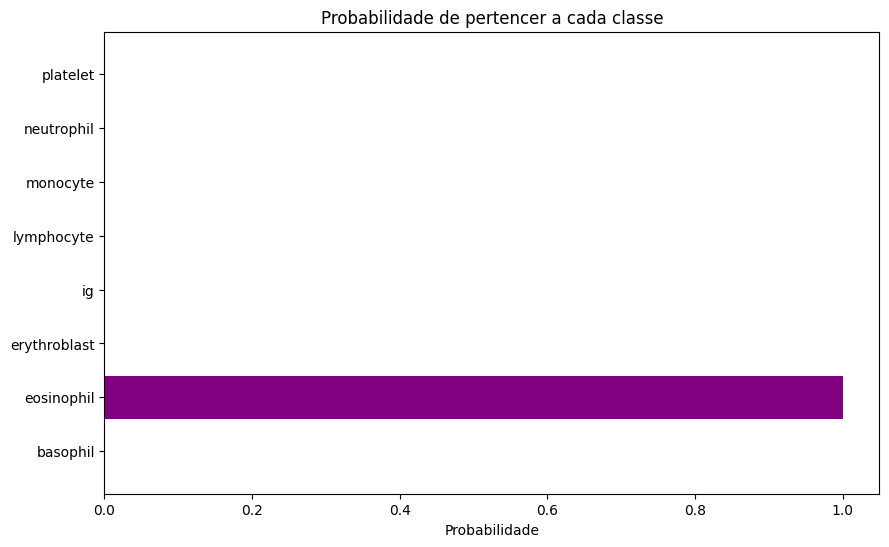

In [107]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Carregar o modelo salvo
modelo = tf.keras.models.load_model('modelo_final.keras')

# URL imagem:
caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/Introdução à ciência de dados/projeto_disciplina/imagens_teste/eosinophil-2.jpg'

# Carregamento e processamento da imagem
img = image.load_img(caminho_imagem, target_size=(256, 256))  # Defina o tamanho da imagem de acordo com o modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão para o batch


# Previsão
previsao = modelo.predict(img_array)

# Probabilidades para cada classe
probabilidades = previsao[0]

# Nome das classes
classes = treino.class_names

# Gráfico de barras com as probabilidades
plt.figure(figsize=(10, 6))
plt.barh(classes, probabilidades, color='purple')
plt.xlabel('Probabilidade')
plt.title('Probabilidade de pertencer a cada classe')
plt.show()
